In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
#create variable to hold csv file
file_path = "baseball_project.csv"

In [3]:
# Read our Data file with the pandas library
base_df=pd.read_csv(file_path)
# base_df = base_df.set_index("yearID")
base_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [4]:
base_df = base_df[base_df["yearID"]>=2010]
base_df

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2625,2010,NL,ARI,ARI,W,5,162,81.0,65,97,...,152,0.983,Arizona Diamondbacks,Chase Field,2056941.0,104,105,ARI,ARI,ARI
2626,2010,NL,ATL,ATL,E,2,162,81.0,91,71,...,166,0.980,Atlanta Braves,Turner Field,2510119.0,98,97,ATL,ATL,ATL
2627,2010,AL,BAL,BAL,E,5,162,81.0,66,96,...,141,0.982,Baltimore Orioles,Oriole Park at Camden Yards,1733018.0,101,102,BAL,BAL,BAL
2628,2010,AL,BOS,BOS,E,3,162,81.0,89,73,...,132,0.982,Boston Red Sox,Fenway Park II,3046443.0,106,105,BOS,BOS,BOS
2629,2010,AL,CHA,CHW,C,2,162,81.0,88,74,...,158,0.983,Chicago White Sox,U.S. Cellular Field,2194378.0,105,105,CHW,CHA,CHA
2630,2010,NL,CHN,CHC,C,5,162,81.0,75,87,...,137,0.979,Chicago Cubs,Wrigley Field,3062973.0,108,108,CHC,CHN,CHN
2631,2010,NL,CIN,CIN,C,1,162,81.0,91,71,...,142,0.988,Cincinnati Reds,Great American Ball Park,2060550.0,99,99,CIN,CIN,CIN
2632,2010,AL,CLE,CLE,C,4,162,81.0,69,93,...,179,0.982,Cleveland Indians,Jacobs Field,1394812.0,93,93,CLE,CLE,CLE
2633,2010,NL,COL,COL,W,3,162,81.0,83,79,...,182,0.984,Colorado Rockies,Coors Field,2875245.0,115,115,COL,COL,COL
2634,2010,AL,DET,DET,C,3,162,81.0,81,81,...,171,0.982,Detroit Tigers,Comerica Park,2461237.0,101,101,DET,DET,DET


In [5]:
base_df.columns


Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [6]:
#Hits per year
hit = base_df.groupby("yearID").mean()["H"]
hit = pd.DataFrame(hit)
hit

,H
yearID,
2010,1418.466667
2011,1408.900000
2012,1402.100000
2013,1403.100000
2014,1386.500000
2015,1403.533333
2016,1409.200000
2017,1407.166667


In [7]:
# caluclate avg hits(2010 - 2013 and 2014 - 2017)
a = hit.iloc[0:4]
a_mean = a.H.mean()
b = hit.iloc[4:]
b_mean = b.H.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

                  H
yearID             
2010    1418.466667
2011    1408.900000
2012    1402.100000
2013    1403.100000
mean: 1408.1416666666669
                  H
yearID             
2014    1386.500000
2015    1403.533333
2016    1409.200000
2017    1407.166667
mean: 1401.6000000000001


In [8]:
# T-Test of avg hits (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [1.02414142].
p=value is [0.34886071].


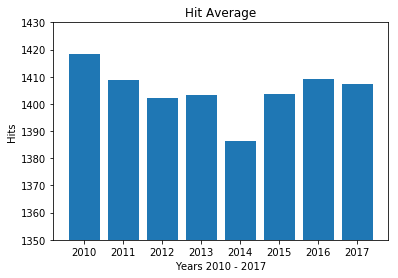

In [9]:
#Chart Format
x_axis = hit.index
y_axis = hit["H"]
plt.bar(x_axis,y_axis)
plt.title("Hit Average")
plt.ylabel("Hits")
plt.xlabel("Years 2010 - 2017")
plt.ylim(1350,1430)
plt.savefig("hit.png")

In [10]:
# Run average per year
Runs = base_df.groupby("yearID").mean()["R"]
Runs = pd.DataFrame(Runs)
Runs

,R
yearID,
2010,710.266667
2011,693.600000
2012,700.566667
2013,675.166667
2014,658.700000
2015,688.233333
2016,724.800000
2017,752.733333


In [11]:
# caluclate avg runs (2010 - 2013 and 2014 - 2017)
a = Runs.iloc[0:4]
a_mean = a.R.mean()
b = Runs.iloc[4:]
b_mean = b.R.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

                 R
yearID            
2010    710.266667
2011    693.600000
2012    700.566667
2013    675.166667
mean: 694.9
                 R
yearID            
2014    658.700000
2015    688.233333
2016    724.800000
2017    752.733333
mean: 706.1166666666668


In [12]:
# T-Test of avg runs (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [-0.51242795].
p=value is [0.6369429].


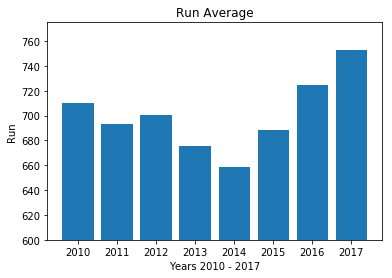

In [13]:
#Chart Format
x_axis = Runs.index
y_axis = Runs["R"]
plt.bar(x_axis,y_axis)
plt.title("Run Average")
plt.ylabel("Run")
plt.xlabel("Years 2010 - 2017")
plt.ylim(600,775)
plt.savefig("run.png")

In [14]:
# ERA average per year
base_df = base_df[base_df["yearID"]>=2010]
ERA = base_df.groupby("yearID").mean()["ERA"]
ERA = pd.DataFrame(ERA)
ERA

,ERA
yearID,
2010,4.073333
2011,3.936667
2012,4.009333
2013,3.863333
2014,3.738000
2015,3.956333
2016,4.184333
2017,4.352667


In [15]:
# caluclate avg ERA (2010 - 2013 and 2014 - 2017)
a = ERA.iloc[0:4]
a_mean = a.ERA.mean()
b = ERA.iloc[4:]
b_mean = b.ERA.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

             ERA
yearID          
2010    4.073333
2011    3.936667
2012    4.009333
2013    3.863333
mean: 3.9706666666666663
             ERA
yearID          
2014    3.738000
2015    3.956333
2016    4.184333
2017    4.352667
mean: 4.057833333333334


In [16]:
# T-Test of avg ERA (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [-0.61605788].
p=value is [0.57391399].


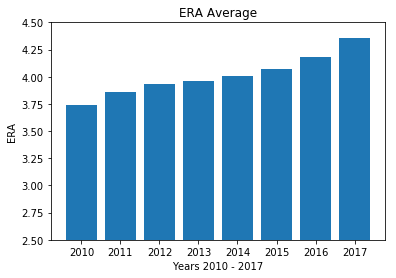

In [17]:
x_axis = ERA.index
y_axis = ERA["ERA"].mode()
plt.bar(x_axis,y_axis)
plt.title("ERA Average")
plt.ylabel("ERA")
plt.xlabel("Years 2010 - 2017")
plt.ylim(2.5,4.5)
plt.savefig("ERA.png")

In [18]:
base_df = base_df[base_df["yearID"]>=2010]
HR = base_df.groupby("yearID").mean()["HR"]
HR = pd.DataFrame(HR)
HR

,HR
yearID,
2010,153.766667
2011,151.733333
2012,164.466667
2013,155.366667
2014,139.533333
2015,163.633333
2016,187.000000
2017,203.500000


In [19]:
# caluclate avg home runs (2010 - 2013 and 2014 - 2017)
a = HR.iloc[0:4]
a_mean = a.HR.mean()
a_mean
b = HR.iloc[4:]
b_mean = b.HR.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

                HR
yearID            
2010    153.766667
2011    151.733333
2012    164.466667
2013    155.366667
mean: 156.33333333333334
                HR
yearID            
2014    139.533333
2015    163.633333
2016    187.000000
2017    203.500000
mean: 173.41666666666666


In [20]:
# T-Test of avg HR (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [-1.20095373].
p=value is [0.31007187].


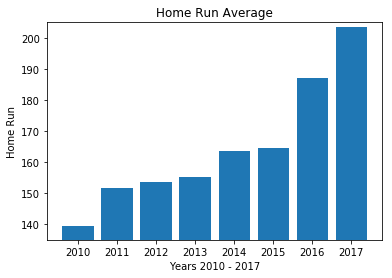

In [21]:
#format chart
x_axis = HR.index
y_axis = HR["HR"].mode()
plt.bar(x_axis,y_axis)
plt.title("Home Run Average")
plt.ylabel("Home Run")
plt.xlabel("Years 2010 - 2017")
plt.ylim(135,205)
plt.savefig("HRAVE.png")

In [22]:
base_df = base_df[base_df["yearID"]>=2010]
double = base_df.groupby("yearID").mean()["2B"]
double = pd.DataFrame(double)
double_rn=double.rename(columns={"2B":"Doubles"})
double_rn


,Doubles
yearID,
2010,282.866667
2011,279.966667
2012,275.366667
2013,274.066667
2014,271.233333
2015,274.733333
2016,275.133333
2017,279.900000


In [23]:
# caluclate avg doubles (2010 - 2013 and 2014 - 2017)
a = double_rn.iloc[0:4]
a_mean = a.Doubles.mean()
a_mean
b = double_rn.iloc[4:]
b_mean = b.Doubles.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

           Doubles
yearID            
2010    282.866667
2011    279.966667
2012    275.366667
2013    274.066667
mean: 278.06666666666666
           Doubles
yearID            
2014    271.233333
2015    274.733333
2016    275.133333
2017    279.900000
mean: 275.25


In [24]:
# T-Test of avg 2B (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [1.04026102].
p=value is [0.33900941].


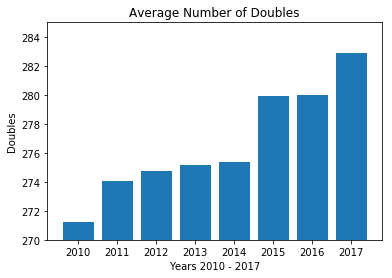

In [25]:
x_axis = double_rn.index
y_axis = double_rn["Doubles"].mode()
plt.bar(x_axis,y_axis)
plt.title("Average Number of Doubles")
plt.ylabel("Doubles")
plt.xlabel("Years 2010 - 2017")
plt.ylim(270,285)
plt.savefig("doubles.png")

In [26]:
#Triples per year
base_df = base_df[base_df["yearID"]>=2010]
triple = base_df.groupby("yearID").mean()["3B"]
triple = pd.DataFrame(triple)
triple_rn=triple.rename(columns={"3B":"Triple"})
triple_rn


,Triple
yearID,
2010,28.866667
2011,29.933333
2012,30.900000
2013,25.733333
2014,28.300000
2015,31.300000
2016,29.100000
2017,26.500000


In [27]:
# caluclate avg triple (2010 - 2013 and 2014 - 2017)
a = triple_rn.iloc[0:4]
a_mean = a.Triple.mean()
a_mean
b = triple_rn.iloc[4:]
b_mean = b.Triple.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

           Triple
yearID           
2010    28.866667
2011    29.933333
2012    30.900000
2013    25.733333
mean: 28.85833333333333
        Triple
yearID        
2014      28.3
2015      31.3
2016      29.1
2017      26.5
mean: 28.8


In [28]:
# T-Test of avg 3B (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [0.03891071].
p=value is [0.97024131].


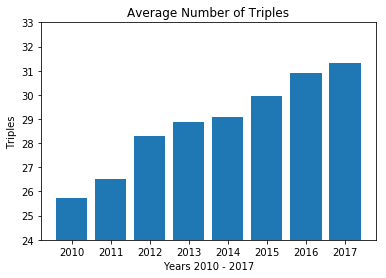

In [29]:
x_axis = triple_rn.index
y_axis = triple_rn["Triple"].mode()
plt.bar(x_axis,y_axis)
plt.title("Average Number of Triples")
plt.ylabel("Triples")
plt.xlabel("Years 2010 - 2017")
plt.ylim(24,33)
plt.savefig("triples.png")

In [30]:
#Fielding Percentage fielding percentage, also known as fielding average, is a measure that reflects the percentage of 
#times a defensive player properly handles a batted or thrown ball. It is calculated by the sum of putouts and assists 
#divided by the number of total chances (putouts + assists + errors).

base_df = base_df[base_df["yearID"]>=2010]
FP = base_df.groupby("yearID").mean()["FP"]
FP = pd.DataFrame(FP)
FP

,FP
yearID,
2010,0.983300
2011,0.983367
2012,0.983433
2013,0.984900
2014,0.984000
2015,0.984500
2016,0.984200
2017,0.984133


In [31]:
# caluclate avg fielding percentage (2010 - 2013 and 2014 - 2017)
a = FP.iloc[0:4]
a_mean = a.FP.mean()
a_mean
b = FP.iloc[4:]
b_mean = b.FP.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

              FP
yearID          
2010    0.983300
2011    0.983367
2012    0.983433
2013    0.984900
mean: 0.9837500000000001
              FP
yearID          
2014    0.984000
2015    0.984500
2016    0.984200
2017    0.984133
mean: 0.9842083333333336


In [32]:
# T-Test of avg FP (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [-1.14991653].
p=value is [0.3235682].


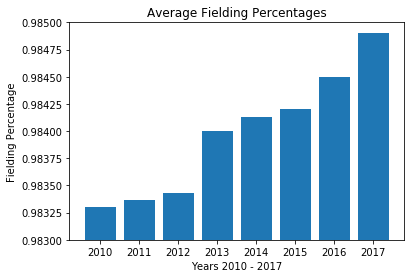

In [33]:
#Fielding Percent Chart
x_axis = FP.index
y_axis = FP["FP"].mode()
plt.bar(x_axis,y_axis)
plt.title("Average Fielding Percentages")
plt.ylabel("Fielding Percentage")
plt.xlabel("Years 2010 - 2017")
plt.ylim(.983,.985)
plt.savefig("fielding.png")

In [34]:
#run average (RA) refers to measures of the rate at which runs are allowed or scored. 
#For pitchers, the run average is the number of runs—earned or unearned—allowed per nine innings.

base_df = base_df[base_df["yearID"]>=2010]
RA = base_df.groupby("yearID").mean()["RA"]
RA = pd.DataFrame(RA)
RA

,RA
yearID,
2010,710.266667
2011,693.600000
2012,700.566667
2013,675.166667
2014,658.700000
2015,688.233333
2016,724.800000
2017,752.733333


In [35]:
# caluclate avg runs agains (2010 - 2013 and 2014 - 2017)
a = RA.iloc[0:4]
a_mean = a.RA.mean()
a_mean
b = RA.iloc[4:]
b_mean = b.RA.mean()
print(a)
print("mean:", a_mean)
print(b)
print("mean:",b_mean)

                RA
yearID            
2010    710.266667
2011    693.600000
2012    700.566667
2013    675.166667
mean: 694.9
                RA
yearID            
2014    658.700000
2015    688.233333
2016    724.800000
2017    752.733333
mean: 706.1166666666668


In [36]:
# T-Test of avg RA (2010 - 2013 and 2014 - 2017)
(t_stat, p) = stats.ttest_ind(a, b, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p=value is {}.".format(p))

t-statistics is [-0.51242795].
p=value is [0.6369429].


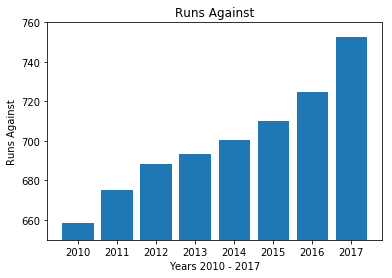

In [37]:
#Fielding Percent Chart
x_axis = RA.index
y_axis = RA["RA"].mode()
plt.bar(x_axis,y_axis)
plt.title("Runs Against")
plt.ylabel("Runs Against")
plt.xlabel("Years 2010 - 2017")
plt.ylim(650,760)
plt.savefig("runsagainst.png")